In [10]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [2]:
tips = seaborn.load_dataset("tips")

In [3]:
type(tips)

pandas.core.frame.DataFrame

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [8]:
tips_ratio = (100 * tips['tip'] / tips['total_bill']).astype(int)
tips['tips_ratio'] = tips_ratio
tips['tips_ratio'].mean()

15.569672131147541

<Figure size 432x288 with 0 Axes>

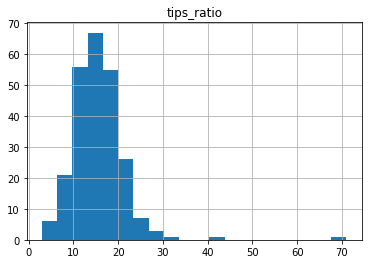

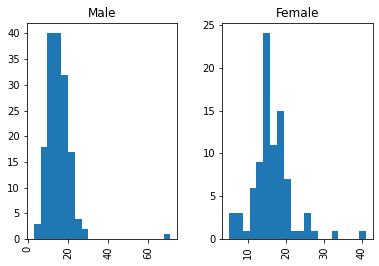

In [11]:
plt.figure(0)
tips.hist(column="tips_ratio", bins=20)
plt.figure(1)
tips.hist(column="tips_ratio", by="sex", bins=20)
plt.show()

In [13]:
# pokazac wysokosc srednia tipa w zaleznosci od time na wykresie slupkowym
s = pd.Series(pd.Categorical(tips.loc[:, "time"]))
s

0      Dinner
1      Dinner
2      Dinner
3      Dinner
4      Dinner
        ...  
239    Dinner
240    Dinner
241    Dinner
242    Dinner
243    Dinner
Length: 244, dtype: category
Categories (2, object): [Lunch, Dinner]

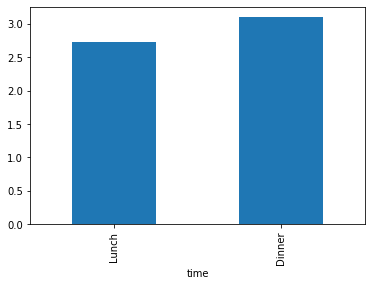

In [14]:
# lunch vs dinner
tip_time_values = tips.groupby('time').mean()['tip']
tip_time_values.plot(kind='bar')
plt.show()

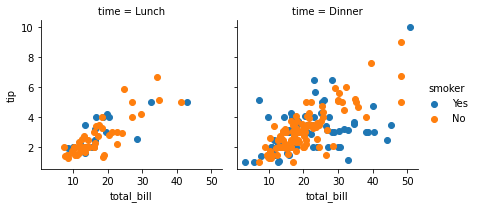

In [16]:
# troche statystyk wedlug czasu, wartosci tipa, wartosci rachunku oraz czy osoba obslugujaca byla palaca
g = seaborn.FacetGrid(tips, col='time', hue='smoker')
g.map(plt.scatter, 'total_bill', 'tip')
g.add_legend()

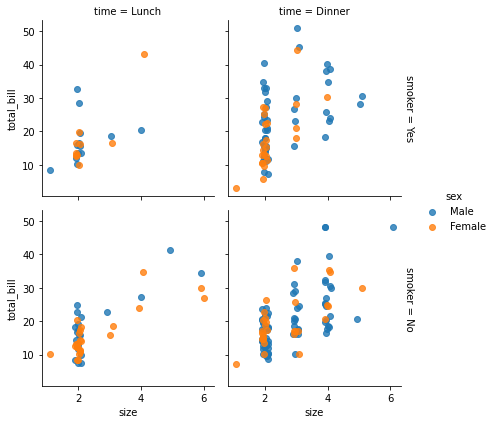

In [19]:
# troche analizy wedlug plci
g = seaborn.FacetGrid(tips, row='smoker', col='time', margin_titles=True, hue='sex')
g.map(seaborn.regplot, 'size', 'total_bill', fit_reg=False, x_jitter=.1)
g.add_legend()

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


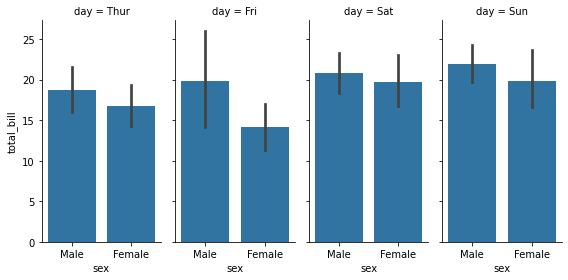

In [21]:
g = seaborn.FacetGrid(tips, col='day', height=4, aspect=.5)
g.map(seaborn.barplot, 'sex', 'total_bill')

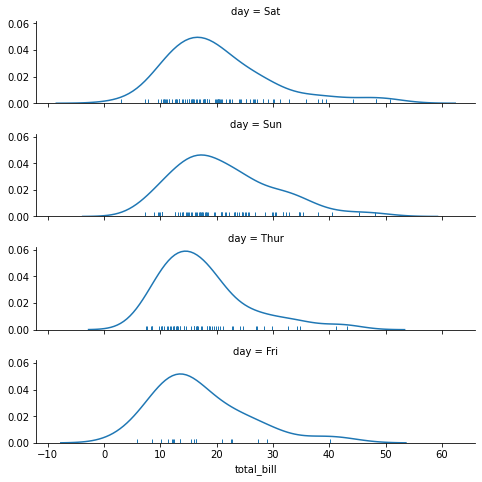

In [23]:
ordered_days = tips.day.value_counts().index
g = seaborn.FacetGrid(tips, row='day', row_order=ordered_days, height=1.7, aspect=4)
g.map(seaborn.distplot, 'total_bill', hist=False, rug=True)